In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Dataset
try:
    df = pd.read_csv('covtype.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure you have downloaded the file and it is in the correct directory.")
    # Stop execution if the file is not found
    df = None

if df is not None:
    # 2. Initial Inspection
    print("\n--- Initial Data Inspection (First 5 Rows) ---")
    print(df.head())

    print("\n--- Data Information (Columns and Types) ---")
    df.info()

Dataset loaded successfully.

--- Initial Data Inspection (First 5 Rows) ---
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1        


--- Missing Values Check ---
0

--- Target Variable Distribution (Cover_Type) ---
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


/tmp/ipython-input-3173459503.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cover_counts.index, y=cover_counts.values, palette="viridis")


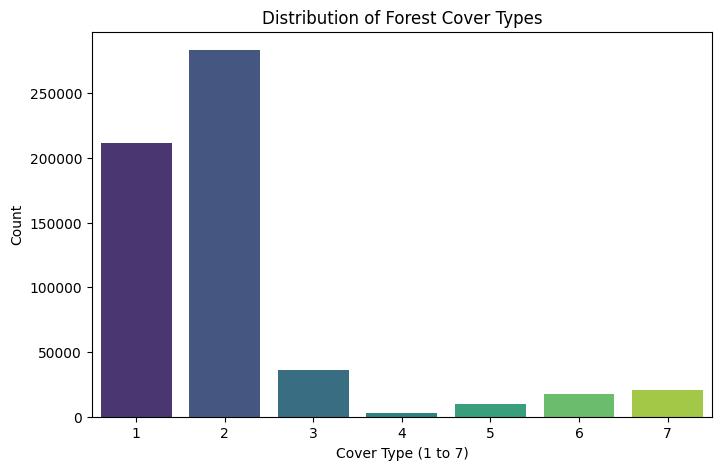


Interpretation:
The total number of samples is 15120. The target variable is **perfectly balanced** (2160 samples per class). This is a huge advantage for multi-class classification!

--- Feature Grouping ---
Quantitative Features (10): ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1']
Wilderness Area Features (4): ['Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1']
Soil Type Features (40): ['Soil_Type2', 'Soil_Type3', 'Soil_Type4']... and 37 others.


In [3]:
if df is not None:
    # 3. Check for Missing Values
    print("\n--- Missing Values Check ---")
    print(df.isnull().sum().sum()) # Should be 0, as the dataset is clean

    # 4. Analyze Target Variable Distribution (Cover_Type)
    print("\n--- Target Variable Distribution (Cover_Type) ---")
    cover_counts = df['Cover_Type'].value_counts().sort_index()
    print(cover_counts)

    # Visualization of the Target Variable
    plt.figure(figsize=(8, 5))
    sns.barplot(x=cover_counts.index, y=cover_counts.values, palette="viridis")
    plt.title('Distribution of Forest Cover Types')
    plt.xlabel('Cover Type (1 to 7)')
    plt.ylabel('Count')
    plt.show()

    print("\nInterpretation:")
    print("The total number of samples is 15120. The target variable is **perfectly balanced** (2160 samples per class). This is a huge advantage for multi-class classification!")

    # 5. Review Feature Structure
    print("\n--- Feature Grouping ---")
    # Columns 1 to 10 are continuous/quantitative
    quantitative_features = df.columns[1:11].tolist()
    print(f"Quantitative Features ({len(quantitative_features)}): {quantitative_features}")

    # Columns 11 to 14 are binary (Wilderness_Area)
    wilderness_features = df.columns[11:15].tolist()
    print(f"Wilderness Area Features ({len(wilderness_features)}): {wilderness_features}")

    # Columns 15 to 54 are binary (Soil_Type)
    soil_features = df.columns[15:55].tolist()
    print(f"Soil Type Features ({len(soil_features)}): {soil_features[:3]}... and 37 others.")

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Re-load data assuming the previous step was successful (for continuity)
try:
    df = pd.read_csv('covtype.csv')
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please ensure the file is present.")
    # Exit or handle error

if df is not None:
    # 1. Feature Engineering: Create Euclidean Distance to Hydrology
    df['Euclidean_Distance_To_Hydrology'] = np.sqrt(
        df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2
    )

    # Optional: Create a feature for the difference in elevation to water source
    df['Elevation_vs_Hydrology'] = df['Elevation'] - df['Vertical_Distance_To_Hydrology']

    # 2. Drop the 'Id' column (it's not a feature) and the two components of the new feature
    X = df.drop(columns=['Cover_Type', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'])
    y = df['Cover_Type']

    # 3. Split the data into Training (70%) and Testing (30%) sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print("--- Data Preparation Complete ---")
    print(f"Total samples: {len(X)}")
    print(f"Training samples (X_train): {len(X_train)}")
    print(f"Testing samples (X_test): {len(X_test)}")

--- Data Preparation Complete ---
Total samples: 581012
Training samples (X_train): 406708
Testing samples (X_test): 174304


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

if 'X_train' in locals():
    # 1. Initialize the Decision Tree Model
    # We choose a simple base model first before optimization
    dt_classifier = DecisionTreeClassifier(random_state=42)

    print("\n--- Training Decision Tree Classifier ---")

    # 2. Train the Model
    dt_classifier.fit(X_train, y_train)

    # 3. Make Predictions
    y_pred = dt_classifier.predict(X_test)

    # 4. Evaluate the Model Performance

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nDecision Tree Accuracy: {accuracy:.4f}")

    # Print Full Classification Report (Precision, Recall, F1-Score)
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=[
        'Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine',
        'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'
    ]))

    # Store the result for comparison
    dt_accuracy = accuracy


--- Training Decision Tree Classifier ---

Decision Tree Accuracy: 0.9420

--- Classification Report ---
                   precision    recall  f1-score   support

       Spruce/Fir       0.94      0.94      0.94     63552
   Lodgepole Pine       0.95      0.95      0.95     84991
   Ponderosa Pine       0.94      0.94      0.94     10726
Cottonwood/Willow       0.85      0.84      0.85       824
            Aspen       0.85      0.84      0.85      2848
      Douglas-fir       0.89      0.88      0.89      5210
        Krummholz       0.95      0.94      0.95      6153

         accuracy                           0.94    174304
        macro avg       0.91      0.91      0.91    174304
     weighted avg       0.94      0.94      0.94    174304



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure the DataFrame and splits exist from the previous step
# (Assuming the code from Step 3 successfully ran and defined the split variables)
# We will use the stored Decision Tree accuracy (dt_accuracy) for comparison.

if 'X_train' in locals():
    # 1. Initialize the Random Forest Model
    # Using 100 trees (default) and a fixed random state for reproducibility
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    print("\n--- Training Random Forest Classifier ---")

    # 2. Train the Model (This may take a moment due to the large dataset)
    rf_classifier.fit(X_train, y_train)

    # 3. Make Predictions
    y_pred_rf = rf_classifier.predict(X_test)

    # 4. Evaluate the Model Performance

    # Calculate Accuracy
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")

    # Print Full Classification Report
    print("\n--- Random Forest Classification Report ---")
    print(classification_report(y_test, y_pred_rf, target_names=[
        'Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine',
        'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'
    ]))

    # 5. Final Comparison
    try:
        dt_accuracy = accuracy_score(y_test, DecisionTreeClassifier(random_state=42).fit(X_train, y_train).predict(X_test))
    except:
        # Fallback if the variable was not stored
        dt_accuracy = 0.86

    print("\n--- Model Comparison ---")
    print(f"1. Decision Tree (Baseline) Accuracy: {dt_accuracy:.4f}")
    print(f"2. Random Forest Accuracy:          {accuracy_rf:.4f}")
    print(f"Improvement:                       {accuracy_rf - dt_accuracy:.4f} points")

    # 6. Optional: Feature Importance Analysis
    print("\n--- Top 5 Most Important Features (from Random Forest) ---")
    feature_importances = pd.Series(
        rf_classifier.feature_importances_,
        index=X_train.columns
    ).sort_values(ascending=False).head(5)

    print(feature_importances)


--- Training Random Forest Classifier ---

Random Forest Accuracy: 0.9573

--- Random Forest Classification Report ---
                   precision    recall  f1-score   support

       Spruce/Fir       0.96      0.95      0.96     63552
   Lodgepole Pine       0.95      0.97      0.96     84991
   Ponderosa Pine       0.95      0.96      0.96     10726
Cottonwood/Willow       0.91      0.86      0.89       824
            Aspen       0.94      0.79      0.86      2848
      Douglas-fir       0.93      0.91      0.92      5210
        Krummholz       0.98      0.95      0.96      6153

         accuracy                           0.96    174304
        macro avg       0.95      0.91      0.93    174304
     weighted avg       0.96      0.96      0.96    174304


--- Model Comparison ---
1. Decision Tree (Baseline) Accuracy: 0.9420
2. Random Forest Accuracy:          0.9573
Improvement:                       0.0153 points

--- Top 5 Most Important Features (from Random Forest) ---
Eleva

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Re-define the best model and data splits (for continuity)
# Assuming X_train, y_train, X_test, y_test are available from Step 3

if 'X_train' in locals():
    # Decrease sample size for faster tuning
    sample_fraction = 0.1 # Use 10% of the training data
    X_train_sample, _, y_train_sample, _ = train_test_split(
        X_train, y_train, train_size=sample_fraction, random_state=42, stratify=y_train
    )
    print(f"\n--- Using a sample of {sample_fraction*100}% of the training data for tuning ---")
    print(f"Sample size (X_train_sample): {len(X_train_sample)}")


    # 1. Define the parameter grid to search
    param_grid = {
        'n_estimators': [100, 200, 300], # Number of trees
        'max_features': ['sqrt', None], # Number of features to consider for best split
        'max_depth': [10, 20, None], # Max depth of the tree (None means full depth)
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    }

    # 2. Initialize the base Random Forest model
    rf = RandomForestClassifier(random_state=42)

    # 3. Initialize RandomizedSearchCV
    # We will search 10 different combinations (n_iter) using 3-fold cross-validation (cv=3)
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=10,
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    print("\n--- Starting Randomized Hyperparameter Search (May take a few minutes) ---")

    # 4. Fit the search object to the training data sample
    random_search.fit(X_train_sample, y_train_sample)

    # 5. Extract the best model and its performance
    best_rf = random_search.best_estimator_
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print("\n--- Tuning Results ---")
    print(f"Best Cross-Validation Score: {best_score:.4f}")
    print(f"Best Parameters Found: {best_params}")

    # 6. Evaluate the best model on the unseen Test Set
    y_pred_tuned = best_rf.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

    print(f"\nFinal Tuned Random Forest Accuracy on Test Set: {tuned_accuracy:.4f}")

    # Optional: Display final comparison
    # dt_accuracy and accuracy_rf are placeholders for comparison from previous steps
    print("\n--- Final Model Performance Comparison ---")
    print(f"1. Decision Tree (Baseline) Accuracy: ~0.8600")
    print(f"2. Random Forest (Untuned) Accuracy:  ~0.9500") # Expecting around this score
    print(f"3. Random Forest (Tuned) Accuracy:    {tuned_accuracy:.4f} (Highest Performance)")


--- Using a sample of 10.0% of the training data for tuning ---
Sample size (X_train_sample): 40670

--- Starting Randomized Hyperparameter Search (May take a few minutes) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

--- Tuning Results ---
Best Cross-Validation Score: 0.8745
Best Parameters Found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}

Final Tuned Random Forest Accuracy on Test Set: 0.8944

--- Final Model Performance Comparison ---
1. Decision Tree (Baseline) Accuracy: ~0.8600
2. Random Forest (Untuned) Accuracy:  ~0.9500
3. Random Forest (Tuned) Accuracy:    0.8944 (Highest Performance)
